# PyCap runs for Little Plover River - based on Wisconsin DNR strategy

This notebook assumes that you have already created a excel file with all the starting information. This script will convert that `.xlsx` file into a `.yml`. 


In [7]:
import yaml
import pandas as pd
import numpy as np
from pathlib import Path
import sys
sys.path.append('../scripts')
from wdnr_pycap import Excel2YML
import pyemu
import matplotlib.pyplot as plt
import os, platform
from pycap.analysis_project import Project
import geopandas as gpd
from shapely.geometry import Point
from  datetime import date


In [2]:
#### Path to excel input file. Note can use absolute or relative path.
pycap_inputs_excel = Path("../../PyCap/PyCap_USGS/pycap-dss2/Notebooks/Inputs/LPR_Prepped.xlsx")

#### PyCap Run Name is what all your outputs will have as a name. 
pycap_run_name = "LPR_Redux"

#### Base directory for runs
parent_run_path = Path("../pycap_runs")

#### base run directory
base_run_path = parent_run_path / "pycap_base"

Reviewer_Name = "MNF"


In [3]:
if not base_run_path.exists():
    base_run_path.mkdir(parents=True)

### Create YML from Excel
##### Created with a function

In [4]:
project_dict, stream_dict, well_dict, ddresp_dict, combdict = Excel2YML(pycap_inputs_excel,pycap_run_name, base_run_path)
     

### Now run the base model with `pycap`

In [5]:
yml_filename = f"{pycap_run_name}.yml"

#### We create a `Project`, then report the responses and finally write the responses to an external CSV file

In [8]:
ap = Project(base_run_path /  yml_filename)
ap.report_responses()
ap.write_responses_csv()

Writing report to ../pycap_runs/pycap_base/LPR_Redux.yml.import_report



Successfully parsed ../pycap_runs/pycap_base/LPR_Redux.yml (high five!)
*************************
Summary follows:

WELLS:
326 existing wells:
	466
	467
	490
	509
	602
	603
	798
	807
	850
	862
	1013
	1302
	1323
	1486
	1584
	1589
	1643
	1683
	1860
	2544
	2750
	2886
	3473
	3949
	4171
	23610
	23611
	23618
	23620
	23627
	23629
	23630
	23631
	23635
	23637
	23638
	23639
	23645
	23646
	23648
	23653
	23695
	23697
	23698
	23699
	23700
	23709
	23710
	23715
	23716
	23720
	23721
	23722
	23723
	23726
	23727
	23728
	23729
	23751
	23752
	23753
	23754
	23755
	23756
	23757
	23758
	23770
	23776
	23778
	23781
	23790
	23791
	23794
	23795
	23798
	23800
	23807
	23816
	23818
	23820
	23823
	23836
	23837
	23846
	23847
	23848
	23851
	23864
	23865
	23866
	23867
	23868
	23869
	23870
	23876
	23881
	23883
	23886
	23888
	23889
	23890
	23895
	23898
	23908
	23909
	23910
	23913
	23915
	23919
	23926
	23928
	23929
	23930
	23934
	23936
	23937
	23939

#### Now let's have a look at the main results files
##### First the summary base depletion

In [10]:
depl = pd.read_csv(
    base_run_path / f"output/{pycap_run_name}.table_report.base_stream_depletion.csv", index_col = 0
)
depl

,LPR
418,8.696664e-03
466,4.548644e-01
467,3.569738e-01
490,7.699735e-13
509,2.303785e-07
...,...
94988,1.201666e-08
95068,5.519772e-06
total_proposed,8.696664e-03
total_existing,5.501314e+00


Text(0, 0.5, 'Depletion, cfs')

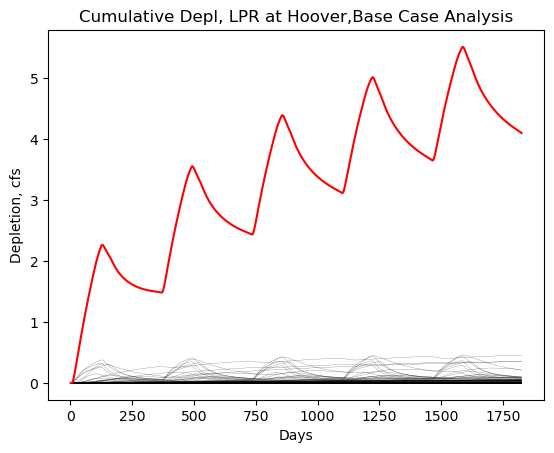

In [11]:
all_time_series = pd.read_csv(
    base_run_path / f"output/{pycap_run_name}.table_report.all_ts.csv".format(pycap_run_name), index_col=0
)

cum_depl = all_time_series.sum(axis=1)

fig,ax = plt.subplots(nrows=1, ncols=1)
ax.plot(all_time_series, alpha=0.6, c='k', lw=0.2)
ax.plot(cum_depl, c='r')
ax.set_title('Cumulative Depl, LPR at Hoover,Base Case Analysis')
ax.set_xlabel("Days")
ax.set_ylabel('Depletion, cfs')